## **Iniciamos con la importación de librerías a utilizar**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importamos la data
data = pd.read_csv('/content/BASE.csv', encoding='ISO-8859-1', sep=';')

# Mostramos las primeras filas para verificar la estructura.
data.head()


,lugar_presenta,proceso,genero,colegio,prof_padre,prof_madre,calificacion_carpeta,meritos,inteligencia,promedio_acad,aptitud_med,ppff,visita_dom,calificacion,apto
0,UIO,OFICIAL DE ARMA,MASCULINO,COLEGIO MILITAR TENIENTE HUGO ORTIZ,MECANICO,INGENIERA,86.1,1.01,119.0,16.45,APTO CON CONDICION,APROBADO,APROBADO,12.88,1
1,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,ODONTÓLOGA,78.0,0.20,130.0,16.25,APTO,APROBADO,APROBADO,11.91,1
2,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,Master en psicología educativa,78.0,0.20,131.0,16.05,APTO CON CONDICION,APROBADO,APROBADO,11.88,1
3,GYE,OFICIAL DE ARMA,FEMENINO,LICEO NAVAL DE GUAYAQUIL,ECONOMISTA,ECONOMISTA,80.0,0.20,130.0,16.20,APTO CON CONDICION,APROBADO,APROBADO,11.67,1
4,GYE,OFICIAL DE ARMA,MASCULINO,UNIDAD EDUCATIVA EUGENIO ESPEJO,MILITAR,BACHILLER,58.0,0.00,109.0,15.25,APTO,APROBADO,APROBADO,11.63,1


In [3]:
# Convertimos a variables categóricas
data['lugar_presenta'] = data['lugar_presenta'].astype('object')
data['proceso'] = data['proceso'].astype('object')
data['genero'] = data['genero'].astype('object')
data['colegio'] = data['colegio'].astype('object')
data['prof_padre'] = data['prof_padre'].astype('object')
data['prof_madre'] = data['prof_madre'].astype('object')
data['aptitud_med'] = data['aptitud_med'].astype('object')
data['ppff'] = data['ppff'].astype('object')
data['visita_dom'] = data['visita_dom'].astype('object')

## **Iniciamos con la construcción del modelo de Árboles de decisión**

In [4]:
# Separa las características (X) y la variable objetivo (y)
X = data[['lugar_presenta','proceso','genero','colegio','prof_padre','prof_madre','calificacion_carpeta','meritos','inteligencia','promedio_acad','aptitud_med','ppff','visita_dom','calificacion']]
y = data['apto']

# Convierte la columna 'apto' a formato numérico (necesario para la clasificación)
y = y.astype(int)

In [5]:
#Dividir los datos en entrenamiento y prueba

# Divide los datos en entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Convertimos el dataset de entrenamiento
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
print("Encoded target variable:", y_train_encoded.dtype)

Encoded target variable: int64


In [7]:
#Creamos el árbol

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through columns in X_train and encode any object (string) columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])



# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier()

# Fit the Decision Tree model using the imputed data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
#Imprimimos el árbol
# Extrae el árbol de decisión del modelo
tree = clf.tree_

# Crea un objeto Graphviz
dot = graphviz.Digraph(name="Arbol_Decision")

# Recorre los nodos del árbol y crea la representación gráfica
nodes = tree.node_count # Use node_count instead of n_nodes
for i in range(nodes):
    node_info = (tree.feature[i], tree.threshold[i]) # Access feature and threshold directly
    #threshold = tree.threshold[i]
    #node_info = tree.tree_structure[i] # This line is no longer needed
    feature = node_info[0] # Extract feature from the tuple
    threshold = node_info[1] # Extract threshold from the tuple
    #value = node_info.value # This attribute is not available anymore
    #left_child = node_info.left_child # This attribute is not available anymore
    #right_child = node_info.right_child # This attribute is not available anymore

    if feature != -2: # Check for leaf nodes using the convention from the Tree class
        label = f"{X.columns[feature]} <= {threshold:.3f}"
    else:
        label = f"Clase: {tree.value[i][0][0]}" # Access class value from the tree.value array

    dot.node(str(i), label=label)

    # Connect nodes based on the tree structure (left and right children)
    if tree.children_left[i] != -1: # Check if left child exists
        dot.edge(str(i), str(tree.children_left[i]))
    if tree.children_right[i] != -1: # Check if right child exists
        dot.edge(str(i), str(tree.children_right[i]))

# Visualiza el árbol de decisión
dot.view()

'Arbol_Decision.gv.pdf'

Precisión: 0.974025974025974


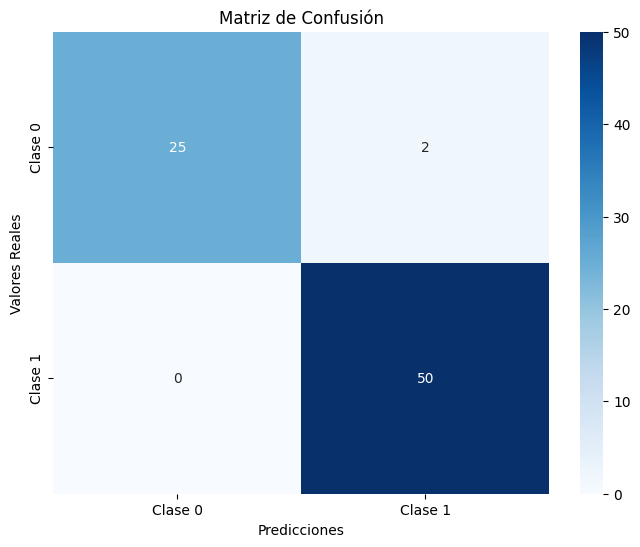

In [9]:
#Evaluamos el modelo
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de columnas en X_test y codificar cualquier columna de objeto (cadena)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = le.fit_transform(X_test[col])  # Apply LabelEncoder to X_test

# Ahora podemos hacer predicciones
y_pred = clf.predict(X_test) # Use the imputed X_test for predictions

# Evaluamos el modelo
from sklearn.metrics import accuracy_score, confusion_matrix # Import necessary functions
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crea un heatmap con seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0", "Clase 1"],  # Reemplaza con tus etiquetas de clase
            yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
#Implementamos el modelo
def predict_dropout(data):
 preds = clf.predict(data)
 return(preds)